# 1. Importing the required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline

# 2. Loading the data into the data frame

In [2]:
#the dataset is in csv format so we'll use read_csv function in pandas and replace blank space with NaN by "na_values=' ' "
all_data=pd.read_csv('webmd.csv', na_values=' ')

In [3]:
#to display the top 5 rows
all_data.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1


In [4]:
#to display the bottom 5 rows
all_data.tail(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,NaN,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,NaN,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


# 3. Checking the dataset, cleaning and manupulation

Before diving into data analysis it is important to check whether there are missing values, inconsistent formatting, malformed records or nonsensical outliers. Null values checked in the main dataset and after the selecting pain condition the null values needs to be check. Looking at the dataset under consideration, there is no variables that inconsistent formatting and records or nonsensical outliers.

In [5]:
#Only some attributes are considered in this project we'll drop attributes that aren't considered in this project.
semicleaned_data=all_data.drop(['Date', 'DrugId', 'Reviews', 'Sides', 'UsefulCount'], axis=1)
#Renaming the columns
semicleaned_data= semicleaned_data.rename(columns={"Satisfaction": "Rating"})
#selecting the rows of our target which is only in pain condition  
semicleaned_data=semicleaned_data[semicleaned_data.Condition.str.contains('Pain', na=False)]

In [6]:
#check the semicleaned data
semicleaned_data.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
count,51744,53649,53649,53649.000000,53649.000000,53649.000000,49951
unique,11,52,635,NaN,NaN,NaN,2
top,45-54,Pain,hydrocodone-acetaminophen,NaN,NaN,NaN,Female
freq,14641,25232,3818,NaN,NaN,NaN,31971
mean,NaN,NaN,NaN,4.154709,3.520084,3.307685,NaN
std,NaN,NaN,NaN,1.192308,1.374853,1.526008,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,4.000000,3.000000,2.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


In [7]:
#looking at the count of each attributes there is a difference between each features which indicates that there are null values in semiclean_data
#Check if null values exist in the dataset
print('Do null values exist in the dataset? ' + str(semicleaned_data.isnull().values.any()))
#if null values exist calculate the total null vaues in each column:
semicleaned_data.isna().sum()

Do null values exist in the dataset? True


Age              1905
Condition           0
Drug                0
EaseofUse           0
Effectiveness       0
Rating              0
Sex              3698
dtype: int64

In [8]:
#since Age and Sex are the determining variable through out this project, they cant be null, 
#hence drop the null values from data set.
cleaned_data=semicleaned_data.dropna(axis=0)

#Check if null values exist in the dataset
print('Do null values exist in the dataset? ' + str(cleaned_data.isnull().values.any()))

#check the number of features and rows of remaining data
print("Dataset contains: " + str(cleaned_data.shape[0]) + " rows and " + str(cleaned_data.shape[1]) + " columns")

#datatype of each attributes of cleaned data
cleaned_data.info()

Do null values exist in the dataset? False
Dataset contains: 49313 rows and 7 columns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49313 entries, 186 to 361615
Data columns (total 7 columns):
Age              49313 non-null object
Condition        49313 non-null object
Drug             49313 non-null object
EaseofUse        49313 non-null int64
Effectiveness    49313 non-null int64
Rating           49313 non-null int64
Sex              49313 non-null object
dtypes: int64(3), object(4)
memory usage: 3.0+ MB


In [9]:
#check the cleaned data
cleaned_data.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
count,49313,49313,49313,49313.000000,49313.000000,49313.000000,49313
unique,11,50,606,NaN,NaN,NaN,2
top,45-54,Pain,hydrocodone-acetaminophen,NaN,NaN,NaN,Female
freq,13966,23355,3504,NaN,NaN,NaN,31570
mean,NaN,NaN,NaN,4.184312,3.528502,3.314461,NaN
std,NaN,NaN,NaN,1.171252,1.370462,1.524398,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,4.000000,3.000000,2.000000,NaN
50%,NaN,NaN,NaN,5.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN


Looking the cleaned data description, the total unique of Drug is 606 and the Condition is 50 although all under the condition of PAIN. However, this unique entries of categorical variable such as Drug and Condition are too much to implement and a regression will be hard because there will be more than 650 dummies. But we'll deal with it later in regression chapter.
The mean, min, maximum and other properties of numerical features are look correct which means we dont have any outliers. 

# 4 Data Analysis

It is important to visualization the data in a graph to communicate relationships of data with images. We need data visualization maily because visual summary of information makes it easier to identify patterns and trends than looking through thousands of rows. Before considering the relationship between two variables it is important to to summarize information having a single variable. Data analysis that involves the relationship between two different variables is called bivariate data and data that has single or only one variable is known as univariate data. 

## 4.1 Univariate Data Analysis

The variable that does not deal with relationships, but rather it is used to describe something in a dataset the age of the drug users which can be considered as univariate data. Hence, let's see the age demography using value_counts function. As shown in the result the highest and the least number of pain medicine users age range is 45-54 and 0-2 respectively. 

Text(0.5,1,'Age Frequency')

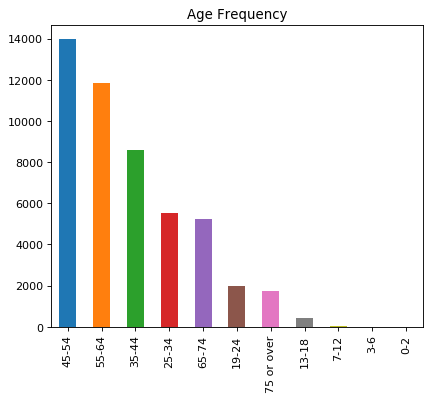

In [10]:
#The visual representation of the aggregated age range using rectangular bars with lengths proportional to the values 
#that they represent. 
plt.figure(figsize=(6,5), dpi= 80)
cleaned_data.Age.value_counts().plot(kind='bar')
plt.title('Age Frequency')

### Devide the aggregated age based on Sex

In order to compare the number (frequency) of Female and Male pain medicine users we plot side-by-side bar plots using subplot function. From the side-by-side rectangular bars with lengths proportional to the values for Female and male plot, one can note that the number of female pain medicine users are higher than male users. 

Text(0.5,1,'Male Age Frequency')

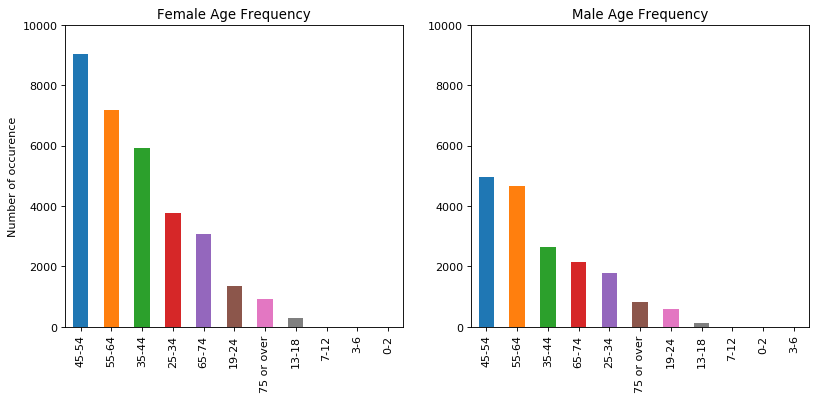

In [11]:
plt.figure(figsize=(12,5), dpi= 80)
plt.subplot(1, 2, 1)
#Extracting female users and plotting the frequency
female_data=cleaned_data[cleaned_data['Sex']=='Female']
female_data.Age.value_counts().plot(kind='bar')
plt.ylim(0,10000)
plt.ylabel('Number of occurence')
plt.title('Female Age Frequency')
plt.subplot(1, 2, 2)
#Extracting male users and plotting the frequency
male_data=cleaned_data[cleaned_data['Sex']=='Male']
male_data.Age.value_counts().plot(kind='bar')
plt.ylim(0,10000)
plt.title('Male Age Frequency')

## 4.2 Bivariate Data Analysis 

The purpose of bivariate data is to analyze and explain the relationship between two different variables. In this section we examine and present the relationship between the variables in the dataset.

### 4.2.1 Frequency Histogram of top five Drug by Age and Sex

The first bivariate data analysis is the relationship between users age and drug type. Then we separate sers age and drug typ relationship by users sex for comparison purpose.
The total unique drugs used for pain relievers is more than 600 which makes it difficult to simply figure out the relationship between the variables. Hence we selected the top five (five most used pain drugs) for analysis purpose. 

In [12]:
cleaned_data=cleaned_data.replace(to_replace=['0-2','3-6','7-12','13-18','19-24','25-34','35-44','45-54','55-64','65-74','75 or over'],
                                  value=[1,5,10,15,20,30,40,50,60,70,80])

In [13]:
female_data=cleaned_data[cleaned_data['Sex']=='Female']
male_data=cleaned_data[cleaned_data['Sex']=='Male']

Below is the histogram representing the relationship between Age and top five drugs. Since we selected the top five drugs, we iterate through using 'for loop' for each drug and plot the histogram using hist function. The bins are uniformly divided with the size of 10 and to difrentiate each bin from one another edgecolor is used. From the top five drug distribution across age group, we can see that the distribution is closely resembling of Gaussian distribution where the drug frequency increases as the age increases and after attaing the pick at average age 50 it starts to decrease.

In [14]:
drug_data=pd.Series(cleaned_data.groupby('Drug')['Drug'].count())
drug_data=drug_data.sort_values(ascending=False)
top_five=drug_data.index[:5]
# Subset to the top 5 drugs
top_five_drug=cleaned_data[cleaned_data['Drug'].isin(top_five)]

Text(26.6528,0.5,'Drug Frequency')

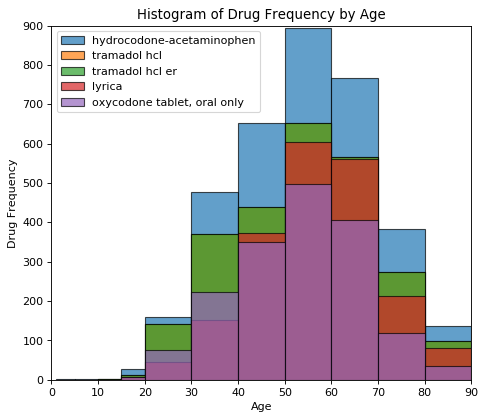

In [15]:
#figure size
plt.figure(figsize=(6,5), dpi= 80)
bins=[1,5,10,15,20,30,40,50,60,70,80,90]

# Iterate through each of the top five drugs
for medicine in top_five:
    subset=top_five_drug[top_five_drug['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k',
                label=medicine)
plt.xlim(0,90)
plt.ylim(0,900)
plt.legend()
plt.tight_layout()
plt.title('Histogram of Drug Frequency by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

The frequency relationship of drug and age for female and male users are analyzed. First we selected female and male users then exratct the top five drugs for each gender. We note that the top five drugs are different for male and female users. The top five drugs for female users are: hydrocodone-acetaminophen, tramadol hcl er, tramadol hcl,lyrica and cymbalta. The drugs used by male in top five are: hydrocodone-acetaminophen, tramadol hcl, tramadol hcl er,lyrica and oxycodone tablet, oral only. Even though the top drugs are different, the distribution trend is the similar except at the pick. Average age of 50 is the pick for female users and for male users teh pick is 50 and 60. One can obivously note that the female users are greater in number than male users.

In [16]:
# Extract top five drugs used the most among Female users
drug_female=pd.Series(female_data.groupby('Drug')['Drug'].count())
drug_female=drug_female.sort_values(ascending=False)
top_five_female=drug_female.index[:5]

# Subset to the top 5 drugs
top_five_drug_female=female_data[female_data['Drug'].isin(top_five_female)]


In [17]:
# Extract top five drugs used the most among male users
drug_male=pd.Series(male_data.groupby('Drug')['Drug'].count())
drug_male=drug_male.sort_values(ascending=False)
top_five_male=drug_male.index[:5]

# Subset to the top 5 drugs
top_five_drug_male=male_data[male_data['Drug'].isin(top_five_male)]


Text(0,0.5,'Drug Frequency')

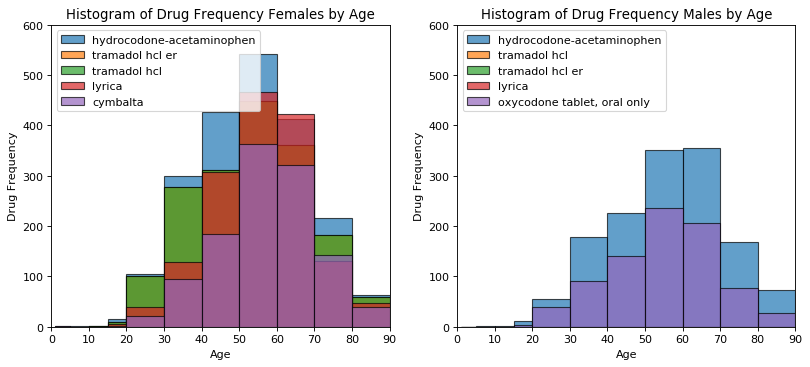

In [18]:
#figure size
plt.figure(figsize=(12,5), dpi= 80)
bins=[1,5,10,15,20,30,40,50,60,70,80,90]

# Iterate through each of the five drugs
plt.subplot(1,2,1)
for medicine in top_five_female:
    subset=top_five_drug_female[top_five_drug_female['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k',
                label=medicine)
plt.xlim(0,90)  
plt.ylim(0,600)
plt.legend(loc='upper left')
#plt.tight_layout()
plt.title('Histogram of Drug Frequency Females by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

# Iterate through each of the five drugs
plt.subplot(1,2,2)
for medicine in top_five:
    subset=top_five_drug_male[top_five_drug_male['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k',label=medicine)
plt.xlim(0,90)
plt.ylim(0,600)
plt.legend(loc='upper left')
#plt.tight_layout()
plt.title('Histogram of Drug Frequency Males by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

### 4.2.2 Frequency Histogram of top five numerical variables by Age and Sex

#### a. Frequency Histogram of EaseofUse for top five drugs

Since we know the top five drugs used by the both male and female, we hard coded the drug type and extract the coresponding EaseofUse and plot histogram with hist function. Looking at the plot, the EaseofUse frequency generaly increases as the EasofUse increase. 

Text(0.5,1,'Histogram of EaseofUse Frequency')

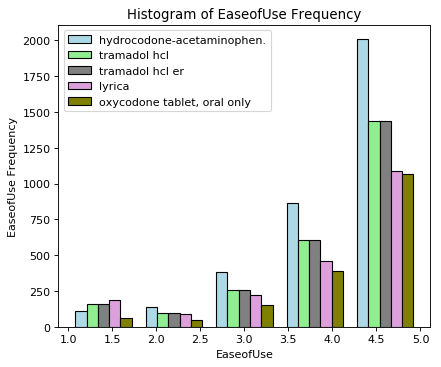

In [19]:
# Extract EaseofUse for top five drugs used  

x1 = list(cleaned_data[cleaned_data['Drug'] == 'hydrocodone-acetaminophen']['EaseofUse'])
x2 = list(cleaned_data[cleaned_data['Drug'] == 'tramadol hcl']['EaseofUse'])
x3 = list(cleaned_data[cleaned_data['Drug'] == 'tramadol hcl er']['EaseofUse'])
x4 = list(cleaned_data[cleaned_data['Drug'] == 'lyrica']['EaseofUse'])
x5 = list(cleaned_data[cleaned_data['Drug'] == 'oxycodone tablet, oral only']['EaseofUse'])

plt.figure(figsize=(6,5), dpi= 80)
# Assign colors for each Drug and EaseofUse
colors = ['lightblue', 'lightgreen', 'gray', 'plum', 'olive']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']

plt.hist([x1, x2, x3, x4, x5], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('EaseofUse')
plt.ylabel('EaseofUse Frequency')
plt.title('Histogram of EaseofUse Frequency')

#### b. The comparison of frequency histogram of EaseofUse for top five drugs between Female and Male Users

To see the effect of gender on the EaseofUse frequency for top five drugs, we plot the histogram for both gender implementing the same method above. The frequency trend for female users is very similar eith the over all frequency distribution presented above but the for male it is a little different.  

Text(0.5,1,'Histogram of EaseofUse Frequency of Male')

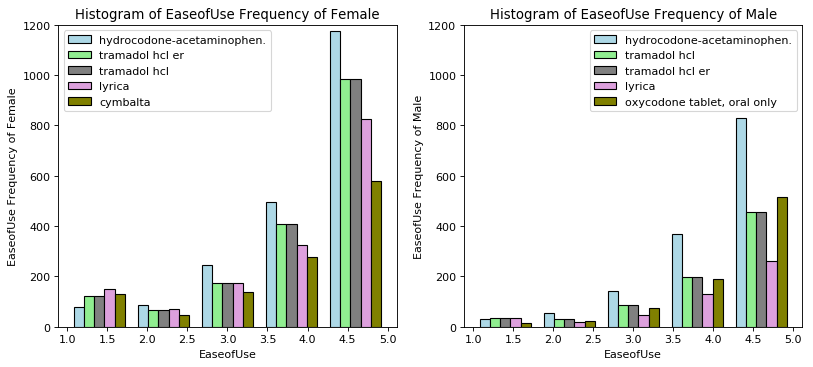

In [20]:
# Extract EaseofUse for top five drugs used  
plt.figure(figsize=(12,5), dpi= 80)
y1 = list(female_data[female_data['Drug'] == 'hydrocodone-acetaminophen']['EaseofUse'])
y2 = list(female_data[female_data['Drug'] == 'tramadol hcl er']['EaseofUse'])
y3 = list(female_data[female_data['Drug'] == 'tramadol hcl']['EaseofUse'])
y4 = list(female_data[female_data['Drug'] == 'lyrica']['EaseofUse'])
y5 = list(female_data[female_data['Drug'] == 'cymbalta']['EaseofUse'])

# Assign colors for each Drug and EaseofUse
colors = ['lightblue', 'lightgreen', 'gray', 'plum', 'olive']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl er', 'tramadol hcl',
         'lyrica', 'cymbalta']
plt.subplot(1, 2, 1)
plt.hist([y1, y2, y3, y4, y5], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('EaseofUse')
plt.ylabel('EaseofUse Frequency of Female')
plt.ylim(0,1200)
plt.title('Histogram of EaseofUse Frequency of Female')
# Extract EaseofUse for top five drugs used  
x11 = list(male_data[male_data['Drug'] == 'hydrocodone-acetaminophen']['EaseofUse'])
x12 = list(male_data[male_data['Drug'] == 'tramadol hcl']['EaseofUse'])
x13 = list(male_data[male_data['Drug'] == 'tramadol hcl er']['EaseofUse'])
x14 = list(male_data[male_data['Drug'] == 'lyrica']['EaseofUse'])
x15 = list(male_data[male_data['Drug'] == 'oxycodone tablet, oral only']['EaseofUse'])
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']

plt.subplot(1, 2, 2)
plt.hist([x11, x12, x13, x14, x15], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('EaseofUse')
plt.ylabel('EaseofUse Frequency of Male')
plt.ylim(0,1200)
plt.title('Histogram of EaseofUse Frequency of Male')

#### c. Frequency Histogram of Effectiveness for top five drugs 

Frequency Histogram of Effectiveness for top five drugs are also plotted for both gender in aggregate and in separate. Both extraction and plotting methods are the same as that used EaseofUse variable. Looking at the plot, the frequency of the first drug hydrocodone-acetaminophen is much higher that the next drugs.

Text(0.5,1,'Histogram of Effectiveness Frequency')

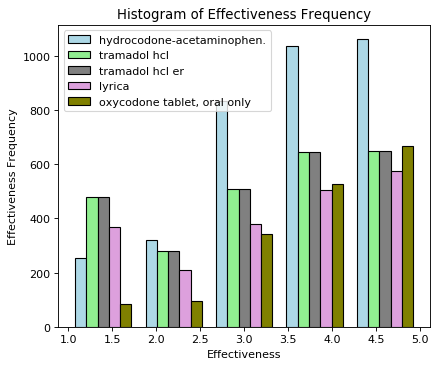

In [21]:
# Extract Effectiveness for top five drugs used  
plt.figure(figsize=(6,5), dpi= 80)
x6 = list(cleaned_data[cleaned_data['Drug'] == 'hydrocodone-acetaminophen']['Effectiveness'])
x7 = list(cleaned_data[cleaned_data['Drug'] == 'tramadol hcl']['Effectiveness'])
x8 = list(cleaned_data[cleaned_data['Drug'] == 'tramadol hcl er']['Effectiveness'])
x9 = list(cleaned_data[cleaned_data['Drug'] == 'lyrica']['Effectiveness'])
x10 = list(cleaned_data[cleaned_data['Drug'] == 'oxycodone tablet, oral only']['Effectiveness'])

# Assign colors for each Drug and EaseofUse
colors = ['lightblue', 'lightgreen', 'gray', 'plum', 'olive']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']

plt.hist([x6, x7, x8, x9, x10], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('Effectiveness')
plt.ylabel('Effectiveness Frequency')
plt.title('Histogram of Effectiveness Frequency')

#### d. Frequency Histogram of Effectiveness for top five drugs among Female and Male Users

In this section we plot the comparison of the frequency of effectiveness for top five drugs between Female and Male users. The effectiveness frequency distribution of female users and the aggregated frequency distribution is similar  

Text(0.5,1,'Histogram of Effectiveness Frequency of Male')

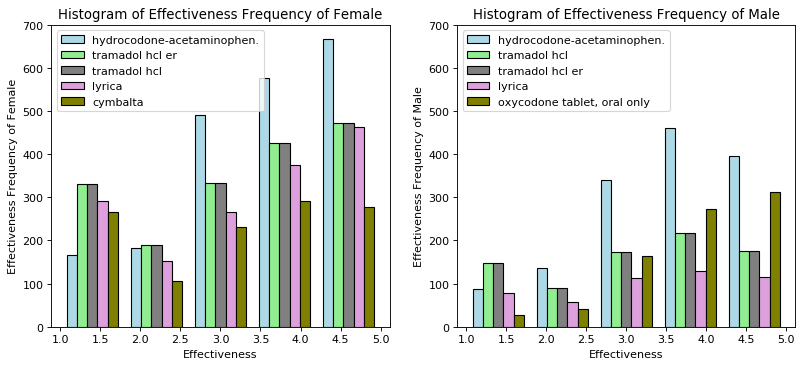

In [22]:
plt.figure(figsize=(12,5), dpi= 80)
# Extract Effectiveness for top five drugs used  
x6 = list(female_data[female_data['Drug'] == 'hydrocodone-acetaminophen']['Effectiveness'])
x7 = list(female_data[female_data['Drug'] == 'tramadol hcl er']['Effectiveness'])
x8 = list(female_data[female_data['Drug'] == 'tramadol hcl']['Effectiveness'])
x9 = list(female_data[female_data['Drug'] == 'lyrica']['Effectiveness'])
x10 = list(female_data[female_data['Drug'] == 'cymbalta']['Effectiveness'])

# Assign colors for each Drug and EaseofUse
colors = ['lightblue', 'lightgreen', 'gray', 'plum', 'olive']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl er', 'tramadol hcl',
         'lyrica', 'cymbalta']
plt.subplot(1,2,1)
plt.hist([x6, x7, x8, x9, x10], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('Effectiveness')
plt.ylabel('Effectiveness Frequency of Female')
plt.ylim(0,700)
plt.title('Histogram of Effectiveness Frequency of Female')

# Extract Effectiveness for top five drugs used  
x16 = list(male_data[male_data['Drug'] == 'hydrocodone-acetaminophen']['Effectiveness'])
x17 = list(male_data[male_data['Drug'] == 'tramadol hcl']['Effectiveness'])
x18 = list(male_data[male_data['Drug'] == 'tramadol hcl er']['Effectiveness'])
x19 = list(male_data[male_data['Drug'] == 'lyrica']['Effectiveness'])
x110 = list(male_data[male_data['Drug'] == 'oxycodone tablet, oral only']['Effectiveness'])

plt.subplot(1,2,2)
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']
plt.hist([x16, x17, x18, x19, x110], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend(loc='upper left')
plt.xlabel('Effectiveness')
plt.ylabel('Effectiveness Frequency of Male')
plt.ylim(0,700)
plt.title('Histogram of Effectiveness Frequency of Male')

## 4.3 Probability Histogram

### 4.3.1 Probability Histogram of top five Drug by Age

Text(0,0.5,'Drug Probability')

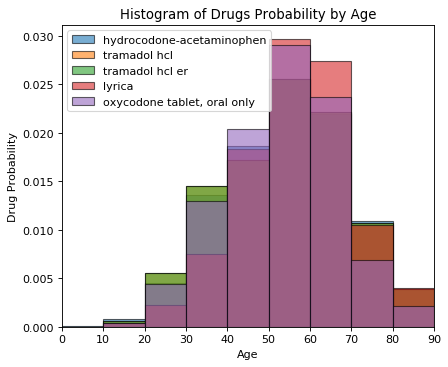

In [23]:
#figure size
plt.figure(figsize=(6,5), dpi= 80)
bins=[0,10,20,30,40,50,60,70,80, 90]

# Iterate through each of the five drugs
for medicine in top_five:
    subset=top_five_drug[top_five_drug['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.6,edgecolor='k', density=True,
                label=medicine)
plt.xlim(0,90)    
plt.legend()
plt.title('Histogram of Drugs Probability by Age'); plt.xlabel('Age'); plt.ylabel('Drug Probability')

In [24]:
### Proability Histogram of top five Drug by Age of Female and Male

C:\Users\wityy\Anaconda3\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0,0.5,'Drug Probability')

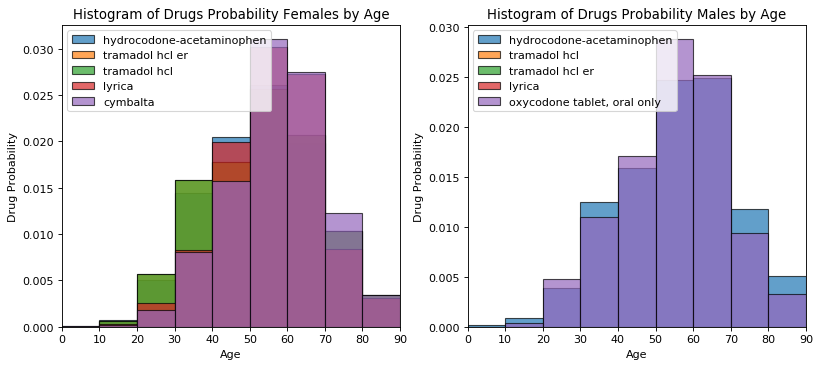

In [25]:
#figure size
plt.figure(figsize=(12,5), dpi= 80)
bins=[0,10,20,30,40,50,60,70,80, 90]


# Iterate through each of the five drugs
plt.subplot(1,2,1)
for medicine in top_five_female:
    subset=top_five_drug_female[top_five_drug_female['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7,density=True, edgecolor='k',
                label=medicine)
plt.xlim(0,90)    
plt.legend()
plt.title('Histogram of Drugs Probability Females by Age'); plt.xlabel('Age'); plt.ylabel('Drug Probability')

plt.subplot(1,2,2)
for medicine in top_five:
    subset=top_five_drug_male[top_five_drug_male['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, density=True, edgecolor='k',
                label=medicine)
plt.xlim(0,90)    
plt.legend()
plt.title('Histogram of Drugs Probability Males by Age'); plt.xlabel('Age'); plt.ylabel('Drug Probability')

### 4.3.2 Probability Histogram numerical variables for top five Drug by Age


Text(0.5,1,'Histogram of EaseofUse Probability')

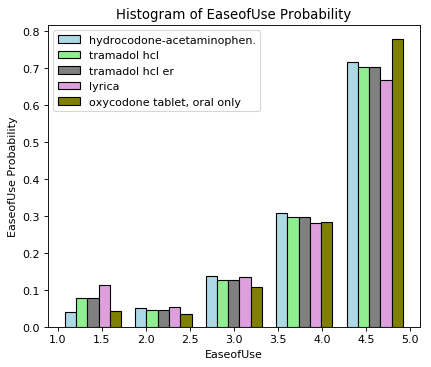

In [26]:
plt.figure(figsize=(6,5), dpi= 80)
plt.hist([x1, x2, x3, x4, x5], bins = 5, edgecolor='k', density=True,
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('EaseofUse')
plt.ylabel('EaseofUse Probability')
plt.title('Histogram of EaseofUse Probability')

In [27]:
### Proability Histogram of Effectiveness for top five drugs

Text(0.5,1,'Histogram of Effectiveness Probability')

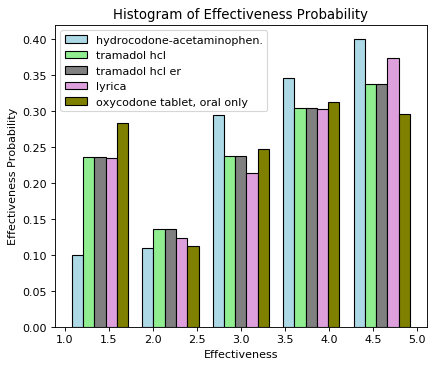

In [28]:
plt.figure(figsize=(6,5), dpi= 80)
plt.hist([x6, x7, x8, x9, x10], bins = 5, edgecolor='k', density=True,
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('Effectiveness')
plt.ylabel('Effectiveness Probability')
plt.title('Histogram of Effectiveness Probability')

In [29]:
### 4.3.2 Probability Histogram numerical variables for top five Drug by Age

# 5 Effectiveness vs EaseofUse to determine the RATING of the drug the best

## 5.1 Relationship between variables

It is always good to start to figure out the relationship between variable before dealing with which variables are more determine the our target variable. We plot the relationship between the variables using scatter matrix in pandas plotting. It is hard to tell about the relationship between the variables from the scatter plot as they are uniform. However, looking at the diagonal histogram the Effectiveness and Rating plot is similar.

C:\Users\wityy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002644CCA7CC0>,
      dtype=object)

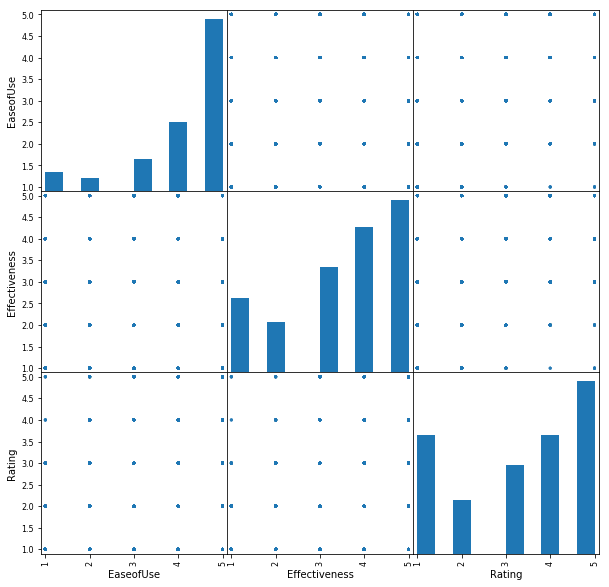

In [30]:
cleaned_data_corr=cleaned_data[['EaseofUse','Effectiveness','Rating']]
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(figsize=(10,10))
#df_data_corr = df[df['turnover']==1]
scatter_matrix(cleaned_data_corr[['EaseofUse','Effectiveness','Rating']], alpha=0.2, diagonal='hist', ax=ax)

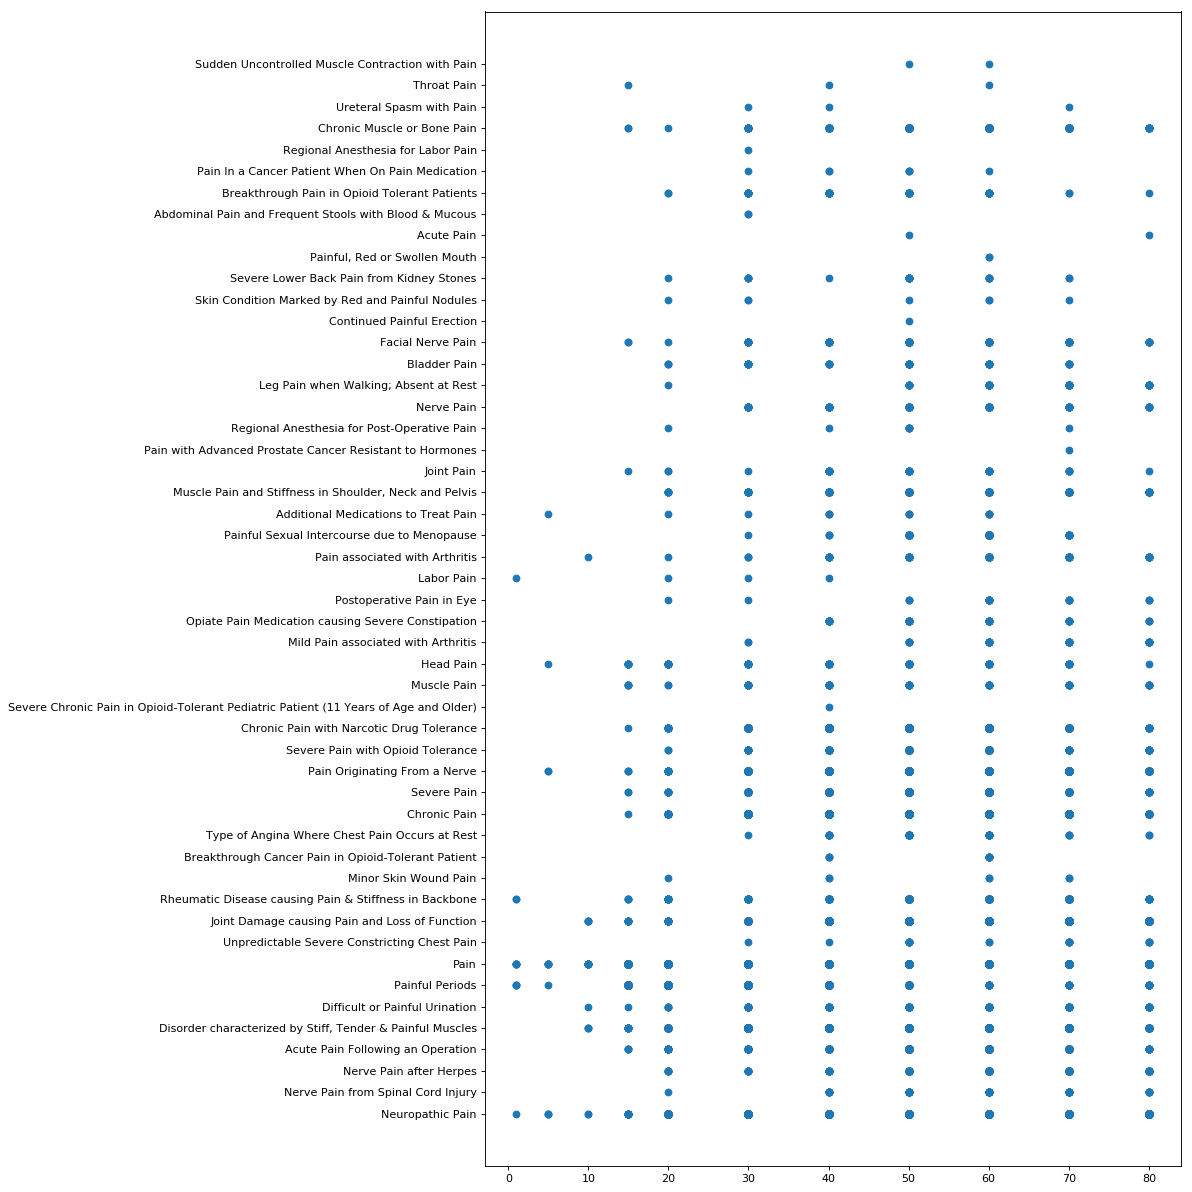

In [31]:
#to see drug distribution acress age group using scatter plot
plt.figure(figsize=(15,15), dpi= 80)
plt.scatter(x=cleaned_data['Age'], y=cleaned_data['Condition'])
plt.tight_layout()
plt.show()

## 5.2 Further investigation of the effect of the two variables on rating

### 5.2.1 Using normalized Easeof Use and Effectiveness

Since the total number of each drug used is different and the corresponding cumulative EaseofUse and Effectiveness are also diffrent. Thus, in order to compare the effect of EaseofUse and Effectiveness of the drug on the Rating, the commulative Easeof Use and Effectiveness should be normilized by number of drugs used for each condition. In onther words we will group the drug and sum the corresponding EaseofUse and Effectiveness and normilize by the total drug. 

In [32]:
#### Commulative EaseofUse per drug in descending order
commulative_EaseofUse_per_drug=cleaned_data.groupby('Drug').EaseofUse.sum().sort_values(ascending=False)
#to display the top 5 rows
commulative_EaseofUse_per_drug.head(5)

Drug
hydrocodone-acetaminophen    15034
tramadol hcl                 10745
tramadol hcl er              10745
lyrica                        8291
oxycodone hcl solution        7494
Name: EaseofUse, dtype: int64

In [33]:
#### Commulative Effectiveness per drug in descending order
commulative_Effectiveness_per_drug=cleaned_data.groupby('Drug').Effectiveness.sum().sort_values(ascending=False)
#to display the top 5 rows
commulative_Effectiveness_per_drug.head(5)

Drug
hydrocodone-acetaminophen    12843
tramadol hcl er               8374
tramadol hcl                  8374
lyrica                        6828
oxycodone hcl                 6735
Name: Effectiveness, dtype: int64

In [34]:
#### Drug count
Drug_count=cleaned_data.Drug.value_counts()
#to display the top 10 rows
Drug_count.head(10)

hydrocodone-acetaminophen      3504
tramadol hcl er                2557
tramadol hcl                   2557
lyrica                         2039
oxycodone tablet, oral only    1713
oxycodone hcl                  1713
oxycodone hcl solution         1713
oxycodone hcl er               1713
cymbalta                       1442
neurontin                      1387
Name: Drug, dtype: int64

Once we calculate the cumulative EaseofUse and cumulative Effectiveness as well the corresponding total drug, the next step will be normilizing the calculated cumulative EaseofUse and cumulative Effectiveness by total drug.

In [35]:
#normilize EaseofUse
EaseofUse_Drug_ratio = (commulative_EaseofUse_per_drug / Drug_count).sort_values(ascending=False)

In [36]:
#normilize Effectiveness
Effectiveness_Drug_ratio = (commulative_Effectiveness_per_drug / Drug_count).sort_values(ascending=False)

In order to decide the effective variable to that determine the rating, it important to compare with rating itself. So we'll calculate the commulative rating for each drugs and normilize with total drug.

In [37]:
#### Commulative Rating per drug in descending order
commulative_Rating_per_drug=cleaned_data.groupby('Drug').Rating.sum().sort_values(ascending=False)

In [38]:
#to display the top 10 rows
commulative_Rating_per_drug.head(10)

Drug
hydrocodone-acetaminophen      12475
tramadol hcl er                 7862
tramadol hcl                    7862
oxycodone hcl                   6424
oxycodone hcl er                6424
oxycodone hcl solution          6424
oxycodone tablet, oral only     6424
lyrica                          6119
oxycontin                       4805
vicodin                         4613
Name: Rating, dtype: int64

In [39]:
#normilize Rating
Rating_Drug_ratio = (commulative_Rating_per_drug / Drug_count).sort_values(ascending=False)

Finally we plot the comparison graph including the imaginary x=y graph  included for comparison porpuse. Looking at the comparison plot: drug effectiveness variable can determine the rating of the drug over the EaseofUse.

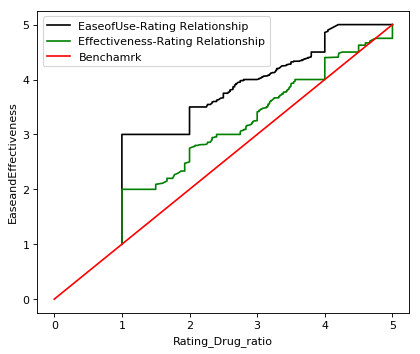

In [40]:
#Imaginary y=x function for comparison porpuse
plt.figure(figsize=(6,5), dpi= 80)
x=[0,1,2,3,4,5]
y=[0,1,2,3,4,5]
plt.plot(Rating_Drug_ratio,EaseofUse_Drug_ratio, 'k', label='EaseofUse-Rating Relationship')
plt.plot(Rating_Drug_ratio, Effectiveness_Drug_ratio, 'g', label='Effectiveness-Rating Relationship')
plt.plot(x,y,'r', label='Benchamrk')
plt.xlabel('Rating_Drug_ratio')
plt.ylabel('EaseandEffectiveness')
plt.legend()
plt.show()

### 5.2.2 Using mean value

For further investigation, we compare the means of EaseofUse and Effectivness with Rating for all age group for both Sex. It is again proved that the mean of Effectiveness is much more close to the mean of rating than that of mean of EaseofUse.

In [41]:
#mean of female users
female_mean=female_data.groupby('Age').mean()
female_mean

,EaseofUse,Effectiveness,Rating
Age,,,
1,2.714286,3.285714,3.142857
5,3.777778,3.666667,3.444444
10,4.000000,3.900000,3.400000
15,4.016892,3.307432,2.912162
20,4.210140,3.625276,3.243204
30,4.112437,3.521612,3.248475
40,4.111505,3.493590,3.276991
50,4.129394,3.474443,3.241712
60,4.177722,3.509804,3.274371


In [42]:
#mean of male users
male_mean=male_data.groupby('Age').mean()
male_mean

,EaseofUse,Effectiveness,Rating
Age,,,
1,4.200000,4.400000,4.200000
5,2.000000,2.800000,2.600000
10,3.818182,4.090909,4.181818
15,4.263158,3.666667,3.377193
20,4.276206,3.668885,3.430948
30,4.310598,3.673055,3.483089
40,4.313844,3.701999,3.528480
50,4.225793,3.580958,3.416010
60,4.289270,3.570172,3.407725


<Figure size 480x400 with 0 Axes>

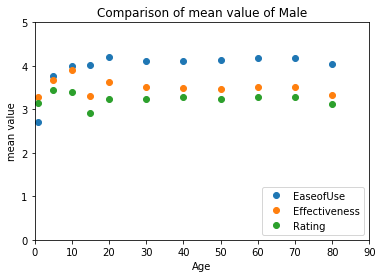

In [43]:
plt.figure(figsize=(6,5), dpi= 80)
female_mean.plot(style='o')
# Plot formatting
plt.xlabel('Age')
plt.ylabel('mean value')
plt.xlim(0,90)
plt.ylim(0,5)
plt.title('Comparison of mean value of Male')
plt.legend(loc='lower right')

<Figure size 480x400 with 0 Axes>

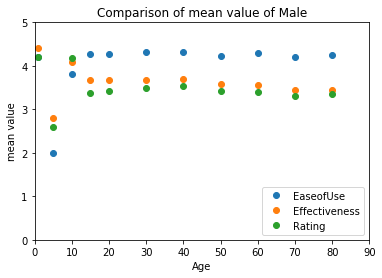

In [44]:
plt.figure(figsize=(6,5), dpi= 80)
male_mean.plot(style='o')
# Plot formatting
plt.xlabel('Age')
plt.ylabel('mean value')
plt.xlim(0,90)
plt.ylim(0,5)
plt.title('Comparison of mean value of Male')
plt.legend(loc='lower right')

# 6. Statical Analysis

### Further Data manuplation

We knew that the total unique drugs are more than 600. However, most tehese drugs are used only once or with low frequency as shown in the plot below. Hence, it is fair to consider drugs at least with the frequency of 500. 

In [45]:
cleaned_data.Drug.value_counts().sort_values(ascending=True)
cleaned_data.head()

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
186,70,Neuropathic Pain,lyrica,5,5,5,Female
187,20,Neuropathic Pain,lyrica,1,3,1,Female
196,50,Neuropathic Pain,lyrica,1,5,1,Female
197,70,Nerve Pain from Spinal Cord Injury,lyrica,4,4,3,Female
200,60,Neuropathic Pain,lyrica,3,1,1,Female


In [46]:
cleaned_data.tail()

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
359898,40,Pain,caldolor vial,3,5,5,Male
360771,70,Pain,choline mag trisalicylate,4,4,1,Male
361513,40,Pain,children's motrin,4,5,2,Female
361535,5,Head Pain,children's acetaminophen,5,4,5,Female
361615,15,Painful Periods,chateal,5,5,4,Female


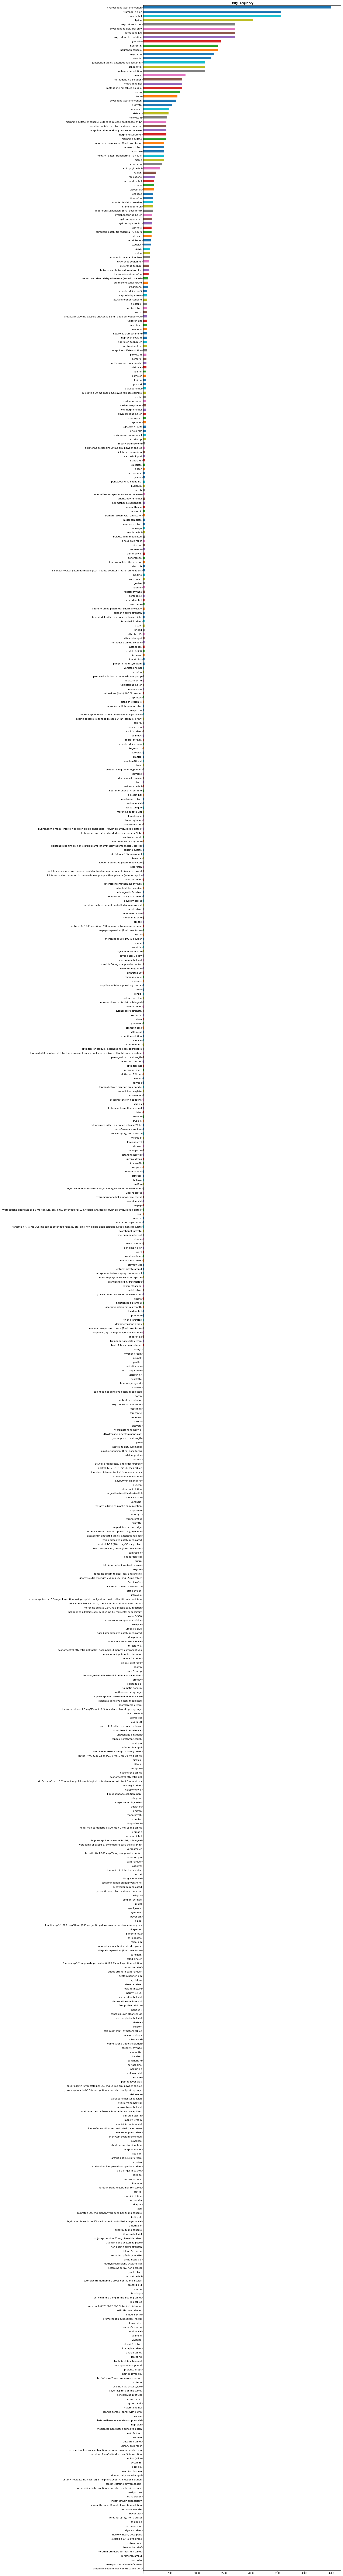

In [47]:
#We already know that the total unique drugs used for the pain relievers is more than 600 which makes it dificult for visualize
#the frequency 
plt.figure(figsize=(15,200), dpi= 80)
cleaned_data.Drug.value_counts().sort_values(ascending=True).plot(kind='barh') 
plt.title('Drug Frequency')
plt.show()

In [48]:
drug=cleaned_data['Drug'].value_counts()
drug=drug[drug>500]

In [49]:
drug_data=cleaned_data[cleaned_data['Drug'].isin(drug.index)]

In [50]:
drug_data.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
count,33186.000000,33186,33186,33186.000000,33186.000000,33186.000000,33186
unique,NaN,14,24,NaN,NaN,NaN,2
top,NaN,Pain,hydrocodone-acetaminophen,NaN,NaN,NaN,Female
freq,NaN,17488,3504,NaN,NaN,NaN,21131
mean,50.195203,NaN,NaN,4.215754,3.567830,3.368770,NaN
std,14.028172,NaN,NaN,1.137830,1.344029,1.503138,NaN
min,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,40.000000,NaN,NaN,4.000000,3.000000,2.000000,NaN
50%,50.000000,NaN,NaN,5.000000,4.000000,4.000000,NaN
75%,60.000000,NaN,NaN,5.000000,5.000000,5.000000,NaN


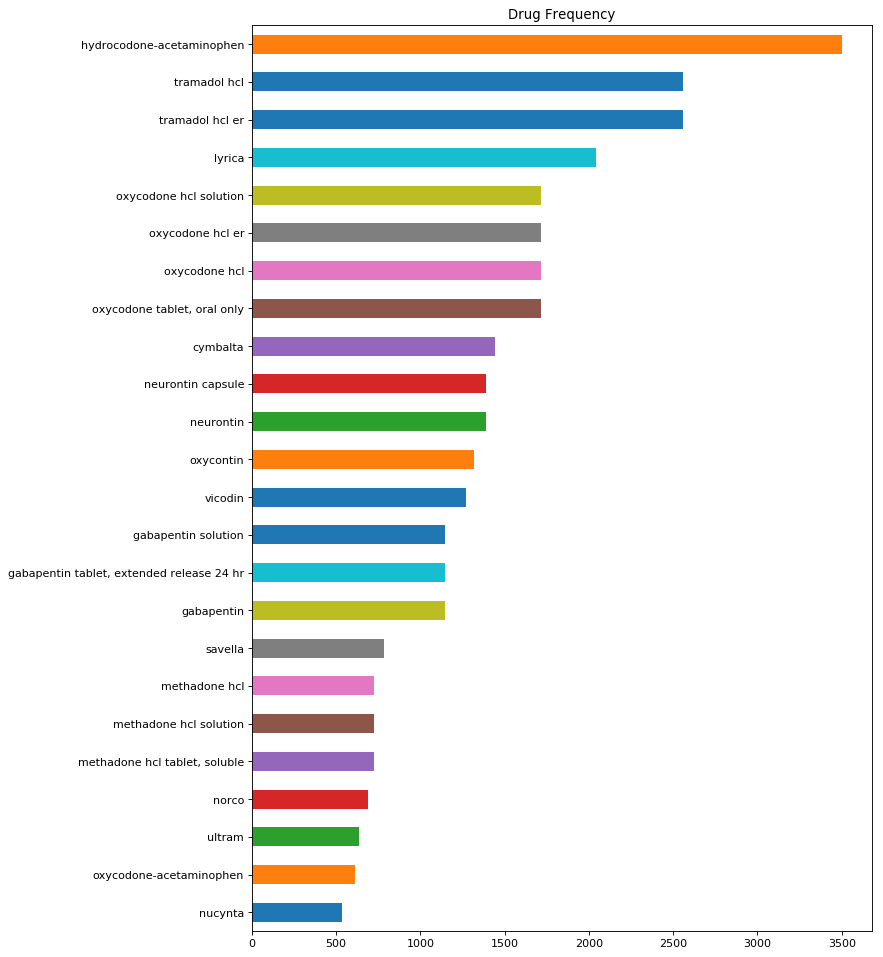

In [51]:
plt.figure(figsize=(10,15), dpi= 80)
drug_data.Drug.value_counts().sort_values(ascending=True).plot(kind='barh') 
plt.title('Drug Frequency')
plt.show()

In [52]:
condition=drug_data['Condition'].value_counts()
condition=condition[condition>100]
condition_data=drug_data[drug_data['Condition'].isin(condition.index)]

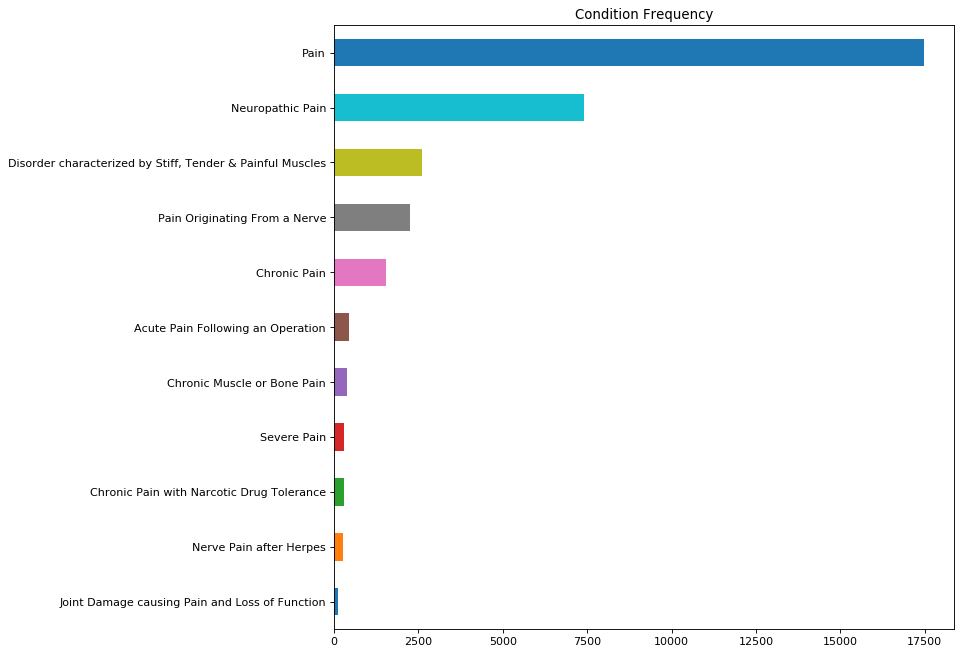

In [53]:
plt.figure(figsize=(10,10), dpi= 80)
condition_data.Condition.value_counts().sort_values(ascending=True).plot(kind='barh') 
plt.title('Condition Frequency')
plt.show()

In [54]:
# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
adj_data=condition_data.reset_index(drop=True)
adj_data.describe(include='all')

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
count,33099.000000,33099,33099,33099.000000,33099.000000,33099.000000,33099
unique,NaN,11,24,NaN,NaN,NaN,2
top,NaN,Pain,hydrocodone-acetaminophen,NaN,NaN,NaN,Female
freq,NaN,17488,3504,NaN,NaN,NaN,21087
mean,50.170942,NaN,NaN,4.215505,3.568507,3.369558,NaN
std,14.025822,NaN,NaN,1.138059,1.343565,1.502868,NaN
min,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,40.000000,NaN,NaN,4.000000,3.000000,2.000000,NaN
50%,50.000000,NaN,NaN,5.000000,4.000000,4.000000,NaN
75%,60.000000,NaN,NaN,5.000000,5.000000,5.000000,NaN


## 6.1 Formulate a hypothesis

### Questions to be answered
#### 1. Does EaseofUse has an impact on Rating or are both correlated?
#### 2. Does Effectiveness has an impact on Rating or are both correlated?
#### 3. What is the effect of Age on Drug used?
#### 4. The combined effect of Age and Condition on Drug used

#### a. Assume that EaseofUse has an impact on Rating with confidence interval of 95%

From now on we treat the female and male data separatley as the effect of drug differs depending on the gender. 

In [55]:
female_adj_data=adj_data[adj_data['Sex']=='Female']
print("The female dataset contains: " + str(female_adj_data.shape[0]) + " rows and " + str(female_adj_data.shape[1]) + " columns")
male_adj_data=adj_data[adj_data['Sex']=='Male']
print("The male dataset contains: " + str(male_adj_data.shape[0]) + " rows and " + str(male_adj_data.shape[1]) + " columns")

The female dataset contains: 21087 rows and 7 columns
The male dataset contains: 12012 rows and 7 columns


In [56]:
import statistics
#computing the confidence interval
female_mean_EaseofUse=np.mean(female_adj_data['EaseofUse'])
female_StdD_EaseofUse=statistics.stdev(female_adj_data['EaseofUse'])
female_mean_Rating=np.mean(female_adj_data['Rating'])
female_StdD_Rating=statistics.stdev(female_adj_data['Rating'])
diff_female_mean=female_mean_EaseofUse-female_mean_Rating
diff_female_StdD=female_StdD_EaseofUse-female_StdD_Rating

In [57]:
# print('Female users EaseofUse mean is ' + str(female_mean_EaseofUse))
# print('Female users EaseofUse standard deviation is ' + str(female_StdD_EaseofUse))
# print('Female users Rating mean is ' + str(female_mean_Rating))
# print('Female users Rating standard deviation is ' + str(female_StdD_EaseofUse))
# print('Female users the difference of mean is ' + str(diff_female_mean))
# print('Female users the difference of standard deviation is ' + str(diff_female_StdD))

In [58]:
male_mean_EaseofUse=np.mean(male_adj_data['EaseofUse'])
male_StdD_EaseofUse=statistics.stdev(male_adj_data['EaseofUse'])
male_mean_Rating=np.mean(male_adj_data['Rating'])
male_StdD_Rating=statistics.stdev(male_adj_data['Rating'])
diff_male_mean=male_mean_EaseofUse-male_mean_Rating
diff_male_StdD=male_StdD_EaseofUse-male_StdD_Rating

In [59]:
# print('Male users EaseofUse mean is ' + str(male_mean_EaseofUse))
# print('Male users EaseofUse standard deviation is ' + str(male_StdD_EaseofUse))
# print('Male users Rating mean is ' + str(male_mean_Rating))
# print('Male users Rating standard deviation is ' + str(male_StdD_EaseofUse))
# print('Male users the difference of mean is ' + str(diff_male_mean))
# print('Male users the difference of standard deviation is ' + str(diff_male_StdD))

In [60]:
# p-value calculation 
# Confidence interval 

### Correlation

It is always good to start to figure out the relationship between variable before dealing with which variables are more determine the our target variable. a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap. In our case we plot the correlation of variables EaseofUse, Effectiveness and Rating. Looking at the plot it the correlation between Effectiveness and Rating is very strong positive correlation than the variables between EaseofUse and Rating.  

In [61]:
adj_data_corr=adj_data[['EaseofUse','Effectiveness','Rating']]
corr = cleaned_data_corr.corr()
corr = (corr)
corr

,EaseofUse,Effectiveness,Rating
EaseofUse,1.00000,0.50606,0.53198
Effectiveness,0.50606,1.00000,0.82921
Rating,0.53198,0.82921,1.00000


In [62]:
female_adj_data_corr=female_adj_data[['EaseofUse','Effectiveness','Rating']]
corr = female_adj_data_corr.corr()
corr1 = (corr)
corr1

,EaseofUse,Effectiveness,Rating
EaseofUse,1.000000,0.518826,0.544021
Effectiveness,0.518826,1.000000,0.821312
Rating,0.544021,0.821312,1.000000


In [63]:
male_adj_data_corr=male_adj_data[['EaseofUse','Effectiveness','Rating']]
corr = male_adj_data_corr.corr()
corr2 = (corr)
corr2

,EaseofUse,Effectiveness,Rating
EaseofUse,1.000000,0.489899,0.514580
Effectiveness,0.489899,1.000000,0.835585
Rating,0.514580,0.835585,1.000000


Text(0.5,1,'Heatmap of Correlation Matrix of Male')

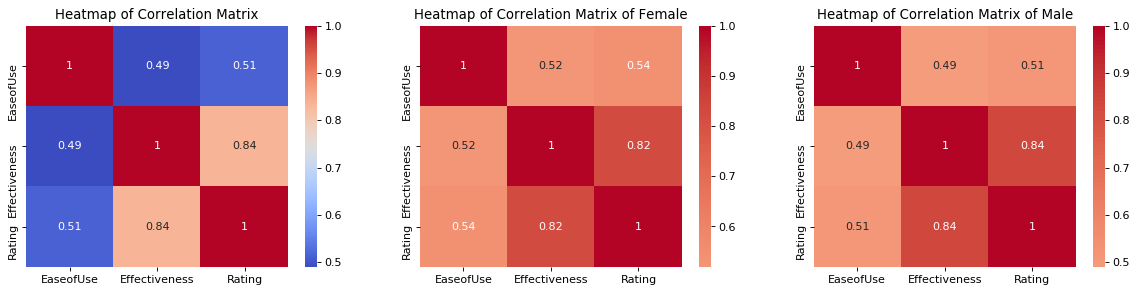

In [64]:
#graphical representation of corellation
plt.figure(figsize=(18,4), dpi= 80)
plt.subplot(1,3,1)
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.title('Heatmap of Correlation Matrix')

plt.subplot(1,3,2)
sns.heatmap(corr1, annot=True,center = 0, cmap = 'coolwarm')
plt.title('Heatmap of Correlation Matrix of Female')

plt.subplot(1,3,3)
sns.heatmap(corr2, annot=True,center = 0, cmap = 'coolwarm')
plt.title('Heatmap of Correlation Matrix of Male')

### Multicollinearity

Multicollinearity refers to predictors that are correlated with other predictors. Multicollinearity occurs when model includes multiple factors that are correlated not just to the response variable, but also to each other. In other words, it results when we have factors that are a bit redundant. Sklearn does not have a built-in way to check for multicollinearity

In [65]:
# Here's the relevant module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = adj_data[['Age','EaseofUse','Effectiveness']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,7.486067,Age
1,15.174165,EaseofUse
2,10.462986,Effectiveness


In [66]:
#Multicollinearity check for female users

variables = female_adj_data[['Age','EaseofUse','Effectiveness']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,7.312292,Age
1,14.362387,EaseofUse
2,10.003386,Effectiveness


In [67]:
#Multicollinearity check for female users

variables = male_adj_data[['Age','EaseofUse','Effectiveness']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,7.814344,Age
1,16.789254,EaseofUse
2,11.373045,Effectiveness


Since EaseofUse and Effectiveness has the highest VIF, I will remove it from the model. beacuse this will drive the VIF of other variables down. 


In [68]:
data = adj_data.drop(['EaseofUse','Effectiveness'],axis=1)

## 6.2 Regression model

### 6.2.1 Create dummy variables

To include the categorical data in the regression, let's create dummies using a very convenient method called: 'get_dummies' which does that seemlessly. It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity.


In [69]:
data_dummies = pd.get_dummies(data, drop_first=True)

In [70]:
data_dummies.head()

,Age,Rating,Condition_Chronic Muscle or Bone Pain,Condition_Chronic Pain,Condition_Chronic Pain with Narcotic Drug Tolerance,"Condition_Disorder characterized by Stiff, Tender & Painful Muscles",Condition_Joint Damage causing Pain and Loss of Function,Condition_Nerve Pain after Herpes,Condition_Neuropathic Pain,Condition_Pain,...,Drug_oxycodone hcl solution,"Drug_oxycodone tablet, oral only",Drug_oxycodone-acetaminophen,Drug_oxycontin,Drug_savella,Drug_tramadol hcl,Drug_tramadol hcl er,Drug_ultram,Drug_vicodin,Sex_Male
0,70,5,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,20,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,50,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,60,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,60,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
#cleaned_data['Age']=cleaned_data.replace(to_replace=[1,5,10,15,20,30,40,50,60,70,80],value= 
                                #  ['0-2','3-6','7-12','13-18','19-24','25-34','35-44','45-54','55-64','65-74','75 or over'])